In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Gradient boosting

You may recall that we last encountered gradients when discussing the gradient descent algorithm in the context of fitting linear regression models.  For a particular regression model with n parameters, an n+1 dimensional space existed defined by all the parameters plus the cost/loss function to minimize.  The combination of parameters and loss function define a surface within the space.  The regression model is fitted by moving down the steepest 'downhill' gradient until we reach the lowest point of the surface, where all possible gradients are 'uphill.'  The final model is made up of the parameter estimates that define that location on the surface.

Throughout all iterations of the gradient descent algorithm for linear regression, one thing remains constant: The underlying data used to estimate the parameters and calculate the loss function never changes.  In gradient boosting, however, the underlying data do change.  

Each time we run a decision tree, we extract the residuals.  Then we run a new decision tree, using those residuals as the outcome to be predicted.  After reaching a stopping point, we add together the predicted values from all of the decision trees to create the final gradient boosted prediction.

Gradient boosting can work on any combination of loss function and model type, as long as we can calculate the derivatives of the loss function with respect to the model parameters.  Most often, however, gradient boosting uses decision trees, and minimizes either the  residual (regression trees) or the negative log-likelihood (classification trees).  

Let’s go through a simple regression example using Decision Trees as the base predictors (of course Gradient Boosting also works great with regression tasks). This is called Gradient Tree Boosting, or Gradient Boosted Regression Trees. First, let’s fit a `DecisionTreeRegressor` to the training set.

In [ ]:
#is this the "BOOSTING" we heard about?? like that's often compared to BAGGING?! but so far i'm not really seeing a resemblance to bagging/bootstrapping - unless
#that's what they mean by the underlying dist changing each time!?!?!?!
#but also idt so far we've talked about dt/rf for REGRESSION!?
#######

In [4]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
#equation 3x^2?

In [5]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
#################################################################################
#WAIT A MINUTE!!!
#the default / pre-loaded output here was completely different!:
# DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
#                       max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=42, splitter='best')

#but i mean, ALL THIS IS IS SIMPLY WHATEVER WE LOADED INTO THE INITIALIZER RIGHT?!
#SO DID THEY SOMEHOW LIKE DIAL IT BACK AFTER THE FACT?? OR *FORGET* TO CHANGE THE
#OUTPUT?!?

#very weird cuz, they go thru 3 supposedly different models,
#but the pre-loaded output is all exactly the same! and then what's
#ACTUALLY written in the initializer is EXACTLY THE SAME TOO!!!!!!
#################################################################################

Now train a second `DecisionTreeRegressor` on the residual errors made by the first predictor:

In [6]:
y1_raw_error = y - tree_reg1.predict(X)
y2 = y1_raw_error #i added the extra step just to make it clear what y2 was!!!
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42) #these are the same params as the first... so couldn't we have just referenced that? or i guess we wanna
#keep the RESULTS that are tied to each tree separate!
tree_reg2.fit(X, y2)
#interesting - so LITERALLY training/fitting on the ERRORS/RESIDUALS of the first model!!! note they're not squared or even ABSOLUTE THO!?! SHOULDN'T THEY BE?!?!
#is this kinda like how that thing we learned about / that one technique / model / classifier type in Stats/Spiegs where we "FOCUS ON OUR MISTAKES" and then give more WEIGHT to
#them in the next round and get better and better each time!? or was that like the more SCORING algorithm?? have to check Stats/Spiegs notes!
#so i guess that wasn't gradient descent/boosting

#SO WHAT DOES TRAINING ON THE ERRORS IN THE LAST ROUND DO!?
#i guess is that akin to how gradient descent works?! where it pendulum swings - tries something, see where it gets you, then tries to *correct* and go the other way,
#see where that gets you, etc! until get to the / hit the sweet spot!?
###########################################################################################################################################################

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
#again/like i said! doesn't match preload which was same as first, and this is
#same as first!

Then we train a third regressor on the residual errors made by the second predictor:



In [7]:
#DANG! HOW IS A MODEL GONNA PERFORM WHEN IT WAS TRAINED ON THE *ERRORS*!?!?!
#again, my add! (lol, like 'my bad' ;P)
y2_raw_error = y2 - tree_reg2.predict(X)
y3 = y2_raw_error
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [8]:
X_new = np.array([[0.8]])

In [9]:
#########################
#the heck is this??
X_new

array([[0.8]])

In [10]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [11]:
y_pred

array([0.75026781])

In [13]:
#open heart surgery
[tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3)]

[array([0.52856846]), array([0.03991297]), array([0.18178637])]

The figure below represents the predictions of these three trees in the left column, and the ensemble’s predictions in the right column. In the first row, the ensemble has just one tree, so its predictions are exactly the same as the first tree’s predictions. In the second row, a new tree is trained on the residual errors of the first tree. On the right you can see that the ensemble’s predictions are equal to the sum of the predictions of the first two trees. Similarly, in the third row another tree is trained on the residual errors of the second tree. You can see that the ensemble’s predictions gradually get better as trees are added to the ensemble.

In [ ]:
#so individual vs. TEAM, aka strength in numbers!?

**<font color='teal'>Run the below cell to develop a visual representation.</font>**

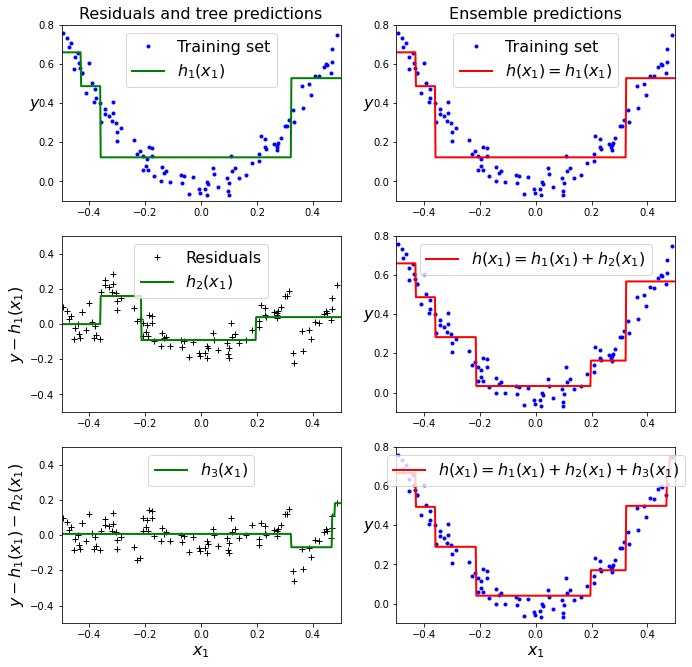

In [14]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

#save_fig("gradient_boosting_plot")
plt.show()

In [ ]:
#ummm, so, really confused. these results do match the preloaded - but so...
#were they SUPPOSED to all be the same?! and simple same as written INSIDE CELL??
#or COMPLICATED same, as pre-loaded??
#or was that 'pre-loaded' just like all the defaults showing??

In [ ]:
#but anyway, so what is this showing? are decision trees for regression
#doing the same type of EDGY/BOXY/PIXELY/'axis-split'-wise cuts / predictions
#to say/predict what the points are!?!?!? based on the X's!?!?!?!?!
#but how can this be better than LINEAR regression?? / polynomial??
#i guess cuz maybe better GENERALIZED for the REGION!?!?!?!?!
#################################################################

Now that you have solid understanding of Gradient Boosting in the regression scenario, let's apply the same algorithm to a classification problem. Specifically, the Titanic dataset and predicting survival.

**<font color='teal'>Use pandas read csv to load in the Titantic data set into a dataframe called df.</font>**

Hint: in this case you can use [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) to just throw away any incomplete rows. For the purpose of this exercise we will disregard them but obviously in the real world you need to be much more careful and decide how to handle incomplete observations. 

In [24]:
titanic = pd.read_csv('titanic.csv')


In [35]:
titanic.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [15]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.shape

(891, 12)

In [17]:
df = df.dropna()
df.shape

(183, 12)

In [ ]:
#WHOAAA! WE JUST REMOVED ALL OF IT!

**<font color='teal'>Print the levels of the categorical data using 'select_dtypes'. </font>**

In [18]:
#again levels?! you mean LABELS??
#but that was w/ .nunique()!? select_dtypes was for something else!?

#maybe means first trim, then look at label counts; that's what we did
#in last one (Corona Random Forest!)

#keep categoricals only
dfo = df.select_dtypes(include=['object'])
dfo

,Name,Sex,Ticket,Cabin,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
10,"Sandstrom, Miss. Marguerite Rut",female,PP 9549,G6,S
11,"Bonnell, Miss. Elizabeth",female,113783,C103,S
...,...,...,...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,11751,D35,S
872,"Carlsson, Mr. Frans Olof",male,695,B51 B53 B55,S
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,11767,C50,C
887,"Graham, Miss. Margaret Edith",female,112053,B42,S


In [ ]:
#eyyy got rid of 7 columns! nice!!!

In [19]:
dfo.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
#embarked?

In [20]:
#labels
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LabelsCount']
vn.sort_values(by='LabelsCount', ascending=False)

,VarName,LabelsCount
0,Name,183
3,Cabin,133
2,Ticket,127
4,Embarked,3
1,Sex,2


In [ ]:
#mA convenient to just keep same variable names!!!! just straight plug n play!!!
#from code used in other notebooks! :D
#lol should we reset index again at end??

#as expected, NAME is unique!!! esp since include MIDDLE name/initial! AND include
#TITLE (Mr. / Mrs. etc) w/ name!!!
#although small chance could have some same sames! w/ basic ones lol John A. Smith


**<font color='teal'>Create dummy features for the categorical features and add those to the 'df' dataframe. Make sure to also remove the original categorical columns from the dataframe.</font>**

In [23]:
#okay so we wanna remove the categoricals from the original df, SO JUST DO INVERSE/BALANCE!:
df = df.select_dtypes(exclude=['object'])
df.head()

#then gonna dummify the categoricals and ADD THESE BACK!!!!!

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [21]:
dfo.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [22]:
#now dummify the CATEGORICALS that we separated off!
dummy_dfo = pd.get_dummies(dfo,drop_first=True)
dummy_dfo.head()

,"Name_Allison, Master. Hudson Trevor","Name_Allison, Miss. Helen Loraine","Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)","Name_Anderson, Mr. Harry","Name_Andrews, Miss. Kornelia Theodosia","Name_Andrews, Mr. Thomas Jr","Name_Appleton, Mrs. Edward Dale (Charlotte Lamson)","Name_Astor, Mrs. John Jacob (Madeleine Talmadge Force)","Name_Aubart, Mme. Leontine Pauline","Name_Ball, Mrs. (Ada E Hall)",...,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#oh lord! WHY DO WE STILL HAVE NAME?!? THAT'S LIKE A UNIQUE IDENTIFIER!!! SHOULDN'T
#MATTER AT ALL!!! WHY DON'T WE BIN?!?!
#all the columns are basically cuz of that! lol!
#############################################

In [29]:
# df = pd.DataFrame(df.drop(dfo.columns,axis =1)).merge(pd.get_dummies(dfo.drop(['Name','Cabin','Ticket'],axis =1)),left_index=True,right_index=True).drop(['PassengerId'],axis =1)
# print(df.shape)
# df.head()

#okay let's break this down one at a time!
# df = pd.DataFrame(df.drop(dfo.columns,axis =1)).merge(pd.get_dummies(dfo.drop(['Name','Cabin','Ticket'],axis =1)),left_index=True,right_index=True).drop(['PassengerId'],axis =1)
# .drop(['PassengerId'],axis =1)

#so just a dataframe of original df where we dropped dfo!
#SO THAT'S JUST THE SAME AS WHAT I DID! AKA *INVERSE*/BALANCE OF DFO!!! where changed include to exclude!
#but then why do you needa make a dataframe AGAIN when it's ALREADY A DATAFRAME?!?!
# df = pd.DataFrame(df.drop(dfo.columns,axis =1))
#                   df.drop(dfo.columns,axis =1)

#okay, now/then second piece:
# merge(pd.get_dummies(dfo.drop(['Name','Cabin','Ticket'],axis =1)),left_index=True,right_index=True)

#merging with the dummied version of dfo, EXCEPT looks like they DON'T want name, cabin or ticket...
#hold up. okay NAME i understand, cuz like i said, unique identifer, not relevant
#OHHH okay, fine/good! i see now - i thought cabin was CLASS but it's like literally almost
#like their room number, if not their room number - in fact, yes i think that's what it is -
#CUZ ALMOST AS MANY UNIQUE CABIN NUMBERS AS THEIR ARE PASSENGERS WHICH MAKES SENSE!!!
#CUZ THIS IS A MANIFESTO OF THE UNIQUE/INDIVIDUAL *PASSENGERS*!!! and yes, that includes
#kids - see dist of age below! but i thought one of the fields was like 'w/ kids' or something?
#well, i guess that can still be there, like for/apply to adults!
#but anyway - yeah makes sense about Cabin cuz OBVY ppl of the same party like FAMILIES/COUPLES
#WERE STAYING IN THE SAME CABIN! like if you grouped ppl according to cabins, you'd iA find
#PPL W/ THE SAME LAST NAME!!!!!! commonly

#but yeah, and then turns out TICKET is also not like fare or class, but rather more like literally
#a ticket *NUMBER*!!!!! this seems to be pretty similar to cabin in that it's 'semi-unique';
#it can't LITERALLY be a ticket number, cuz then everyone would HAVE to have an individual one!
#unless small children weren't required to have a ticket number? but other idea is that it could
#be like a *RESERVATION* NUMBER!!!!! where ppl of the same party share ONE! could do the same
#analysis of names just mentioned! so makes sense that there's right around the same number
#of ticket/reservation numbers as cabin numbers!!! what we'd expect! could be a few diffs ofc,
#/expected, like maybe ppl esp like very LARGE parties, if any, (could do COUNT of ppl/entries)
#for #ppl per cabin#!!!) booked TICKETS together, so same ticket number (could do same
#count on that) but were split into diff rooms! after all, more cabins#s than tickets#s!

#so then again, WE KINDA WASTED OUR TIME DOING THE SELECT_DTYPES IF WE WERE GONNA
#DROP A BUNCH OF THOSE!!! LOL!

#in fact,.... LEMME JUST GO AHEAD AND DO THAT MYSELF!!!!

#BUT REMEM! WE GOTTA GO BACK TO THE *DFO* STEP AND THEN *RE-DUMMY IT*!!!!!!

dfo = dfo.drop(['Name','Cabin','Ticket'],axis =1)
dfo.head()



,Sex,Embarked
1,female,C
3,female,S
6,male,S
10,female,S
11,female,S


In [30]:
#whoaaaa whattha higgy siggy... THAT'S ALL WE GOT LEFT?!?!?! LOLLL!!! skin & bones!!!!! &chefs ;P cruise lol
dummy_dfo = pd.get_dummies(dfo,drop_first=True)
dummy_dfo.head()

,Sex_male,Embarked_Q,Embarked_S
1,0,0,0
3,0,0,1
6,1,0,1
10,0,0,1
11,0,0,1


In [44]:
dummy_dfo.shape

(183, 3)

In [ ]:
#oh yeah still got 183 rows

In [32]:
#there we go! what's the 3rd Embarked?
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#gorch... no idea what these mean
#oh, maybe the CITY they got on at??

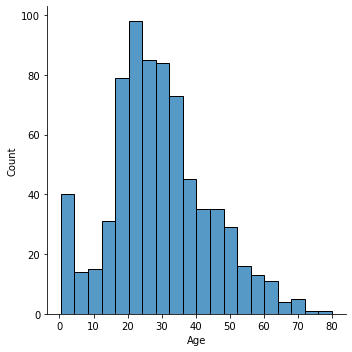

In [28]:
import seaborn as sns #dangggg! how fitting, to use 'sea'born... i'll stop there...
sns.displot(titanic.Age);

In [ ]:
#okay so they also have a third part of dropping passenger id, but... THAT WAS
#ALREADY DROPPED WHEN WE DID DFO!?!?!?!

In [37]:
#count of tickets & cabins!

#how many cabins on/for each ticket ('reservation'!
titanic.groupby('Ticket')['Cabin'].count()

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     0
W./C. 6609     0
W.E.P. 5734    1
W/C 14208      0
WE/P 5735      2
Name: Cabin, Length: 681, dtype: int64

In [38]:
#vv: how many TICKETS('reservation') per CABIN!
titanic.groupby('Cabin')['Ticket'].count()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: Ticket, Length: 147, dtype: int64

In [ ]:
#okay so still hard to tell what's what, whether it's like reservation number,
#or individual adult ticket number, but in any case, for both of these, numbers are LOW
#like we expected

In [ ]:
#original thought then realization lol
#yeahh so we coulda done this way, where we JUST feed the cat cols
#to dummies so don't needa specify columns! then MERGE w/ respy! cuz that
#DOESN'T get dummied!

#OHHHHH! actually this one's different cuz survived IS numerical, even tho binary,
#so THAT WASN'T INCLUDED IN THE OBJECT/TEXT/STRING NIXING OFF OF/FROM SELECT_DTYPES!

**<font color='teal'>Print the null values for each column in the dataframe.</font>**

In [42]:
nullys=pd.DataFrame(dummy_dfo.isnull().sum().sort_values(ascending=False)).reset_index()
nullys.columns = ['Variable', 'Nulls']
nullys

,Variable,Nulls
0,Sex_male,0
1,Embarked_Q,0
2,Embarked_S,0


In [ ]:
#ALHAMDULILLAH! VALIDATION!

**<font color='teal'>Create the X and y matrices from the dataframe, where y = df.Survived </font>**

In [49]:
titanic_drop = titanic.dropna()
titanic_drop.shape

(183, 12)

In [52]:
titanic_drop.Survived

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [53]:
X = dummy_dfo #already set n ready to go!
y = titanic_drop.Survived

#hadda reconfigure my df to get it to what they wanted! to get what i needed for the y!^

#ohh okay, so we can use the original df for the target, cuz that was still 183 rows
#so still lines up. we don't need it attached here, on the dummy!

**<font color='teal'>Apply the standard scaler to the X matrix.</font>**

In [54]:
#they're not doing separately on train & test? in fact, WE DIDN'T EVEN TRAIN/TEST/SPLIT YET!
#interesting, they're doing out of order/diff order
#IF THIS IS ALLOWED WHY DIDN'T WE DO THIS BEFORE?!? ISN'T THIS SO MUCH EASIER?!?
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.fit_transform(X)

**<font color='teal'>Split the X_scaled and y into 75/25 training and testing data subsets..</font>**

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=1)
#already 75/25 by default!

**<font color='teal'>Run the cell below to test multiple learning rates in your gradient boosting classifier.</font>**

In [58]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.672
Accuracy score (validation): 0.674

Learning rate:  0.1
Accuracy score (training): 0.752
Accuracy score (validation): 0.717

Learning rate:  0.25
Accuracy score (training): 0.752
Accuracy score (validation): 0.717

Learning rate:  0.5
Accuracy score (training): 0.752
Accuracy score (validation): 0.696

Learning rate:  0.75
Accuracy score (training): 0.752
Accuracy score (validation): 0.696

Learning rate:  1
Accuracy score (training): 0.752
Accuracy score (validation): 0.696



In [57]:
#####################################################################################
#learning_rate?? oh wait, that's the same thing in gradient descent, right, like the 'alpha',
#coefficient/constant? like a hyperparam here? have to refresh

#max features?? like per round of randomness/node/level?? oh - but there IS only 3 features
#tho right!? so really that's the ONLY CHOICE!!!! N-1!!! at least for small. maybe N-1 for
#every 5 features or so?! cuz if did all 3 ofc that'd just be BOOTSTRAPPING/REG DECISION TREE!
#and if only did 1 then there'd be no CHOICES to randomly choose from! well, i guess the ONE
#that it picked would be picked at random?? but still lol

In [ ]:
#OH NICE! so this was like a type of CROSS-VALIDATION!!!!! via ITERATION!!!
#train always did better than test - good, what we expect
#interesting got EXACT same train score, AND test score, and actually THREE
#same combos of train/test score of one, and two of another!!! in fact, the TRAINING
#score of those 5 ARE ALL THE SAME!!!!!! how does that happen???
#does the learning rate just really not make much of a diff??
#####################################################################################

**<font color='teal'>Apply the best learning rate to the model fit and predict on the testing set. Print out the confusion matrix and the classification report to review the model performance.</font>**

NameError: name 'ConfusionMatrixDisplay' is not defined

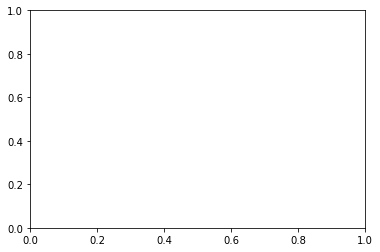

In [59]:
#okay so, .1 & .25 are tied for highest validation accuracy scores. both have same training
#accuracy scores. so... just pick one? we'll go w/ .1, since easier lol

#this feels familiar to what we did in that one case study!

gb_win = GradientBoostingClassifier(n_estimators=20, learning_rate = .1, max_features=2, max_depth = 2, random_state = 0)
#gotta redo this:
gb_win.fit(X_train, y_train)

#ummmm wait tho... confused.. they called that 'validation' above, as if we saved a HOLD-OUT/FINAL test set
#for use now... even though in train/test/split it said just do train/test...
#and we ALREADY tested EACH of these on the TEST SET just now!!!
#soo.... what's left to do?! we ALREADY KNOW how it did!!!!! lollll

#but here goes again...:
# gb_win.score(X_test,y_test)

#oh, well actually, i guess they're NOT saying to redo the score (accuracy), maybe cuz we
#already did, but rather get MORE metrics, which is why they want us to actually PREDICT
#on it, so we can feed it to OTHER stuff like classification report & confusion matrix!

#predictions
y_pred = gb_win.predict(X_test)

####################################################################################


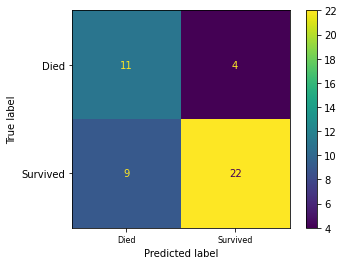

In [60]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

_, ax = plt.subplots() #way to get around??

cmx=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmx,display_labels = ['Died', 'Survived']).plot(ax = ax)

ax.set_xticklabels(labels = ['Died', 'Survived'], fontsize = 8);

In [68]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.73      0.63        15
           1       0.85      0.71      0.77        31

    accuracy                           0.72        46
   macro avg       0.70      0.72      0.70        46
weighted avg       0.75      0.72      0.73        46



In [64]:
#lol nvm! and can't df the print!
# pd.DataFrame(classification_report(y_test,y_pred))

ValueError: DataFrame constructor not properly called!

In [66]:
#oh lol, nvm, you can run this BUT DOESN'T DO ANYTHING! STILL JUST THE SAME AS PRINTING!
# pd.DataFrame(print(classification_report(y_test,y_pred)))

**<font color='teal'>Calculate the ROC for the model as well.</font>**

In [72]:
gb_win.predict_proba(X_test)[:5]

array([[0.08396438, 0.91603562],
       [0.55686035, 0.44313965],
       [0.05295286, 0.94704714],
       [0.08396438, 0.91603562],
       [0.08396438, 0.91603562]])

In [ ]:
#noyyyyyshusshhshnesss!!!!!!!

In [74]:
#oh, but need just a SINGLE/1d array for y! so - get the SURVIVOR odds!(probs/probas ;P)
gb_win.predict_proba(X_test)[:5][:,1]

array([0.91603562, 0.44313965, 0.94704714, 0.91603562, 0.91603562])

In [75]:
gb_win.predict_proba(X_test)[:,1][:5]

array([0.91603562, 0.44313965, 0.94704714, 0.91603562, 0.91603562])

In [84]:
#k cool just wanted to make sure same thing

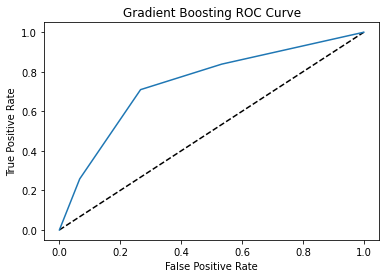

In [85]:
from sklearn.metrics import roc_curve

y_pred_probs = gb_win.predict_proba(X_test)[:,1] #oops lol don't include the '.head()' view limiter [:5]! ;P

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr) #(X,y)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()


In [ ]:
#SALLALLAHU 'ALA MUHAMMAD
#SALLALLAHU 'ALAYHI WA SALLIM!!!!!!
#ALLAHUMMA SALLI 'ALA SAYYIDUNA MUHAMMAD
#WA 'ALA ALY SAYYIDUNA MUHAMMAD
#WA BARIK, WA SALLIM!!!!!!

In [80]:
y_pred_probs.shape

(46,)

In [86]:
y_test.shape

(46,)

In [87]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_probs)

0.7408602150537635

In [ ]:
#LAAA ILLAAAHA ILLA ANT
#SUBHANAK
#INNEE KUNTU MIN ADH-DHAALIMEEN!!!!!!

#ASALAMU 'ALAIKUM
#WA RAHMATULLAHI
#WA BARAKATUH